<a href="https://colab.research.google.com/github/WanQi-K/DataSciencePortfolio/blob/main/California_Housing_Linear_Regression_(More_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

pd.options.display.float_format = '{:.2f}'.format

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame
print(df.shape)

(20640, 9)


In [3]:
df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [4]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


# Data Manipulation

In [5]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [6]:
#Check for outliers, compare  75% and max

rooms_q=df['AveRooms'].quantile(0.99)
data_1=df[df['AveRooms']<rooms_q]

bedrooms_q=data_1['AveBedrms'].quantile(0.99)
data_2=data_1[data_1['AveBedrms']<bedrooms_q]

pop_q=data_2['Population'].quantile(0.99)
data_3=data_2[data_2['Population']<pop_q]

house_q=data_3['AveOccup'].quantile(0.99)
data_4=data_3[data_3['AveOccup']<house_q]

data_cleaned=data_4.reset_index(drop=True)
data_cleaned.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,19824.00,19824.00,19824.00,19824.00,19824.00,19824.00,19824.00,19824.00,19824.00
mean,3.88,28.96,5.26,1.06,1370.57,2.89,35.62,-119.59,2.08
std,1.90,12.50,1.20,0.09,864.42,0.69,2.12,2.00,1.16
min,0.50,1.00,0.85,0.33,3.00,0.75,32.54,-124.35,0.15
25%,2.57,19.00,4.43,1.00,798.00,2.43,33.93,-121.81,1.20
50%,3.54,29.00,5.20,1.05,1168.00,2.82,34.25,-118.50,1.82
75%,4.76,37.00,5.99,1.10,1705.25,3.27,37.71,-118.02,2.67
max,15.00,52.00,10.35,1.60,5826.00,5.34,41.95,-114.55,5.00


Text(0.5, 1.0, ' House M Value & M Income')

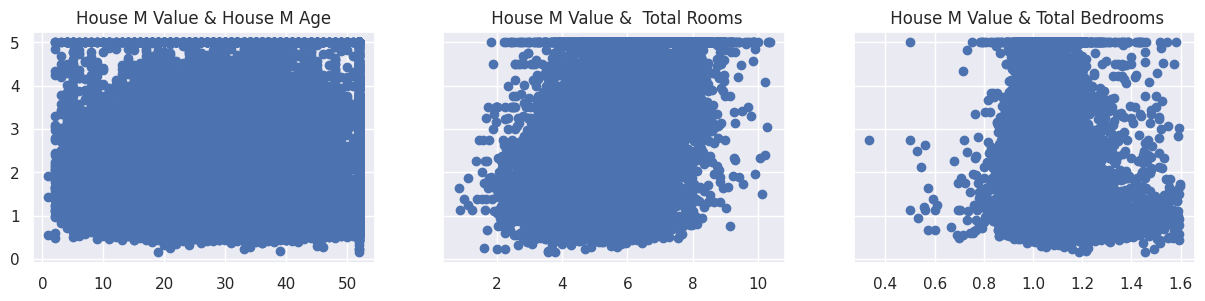

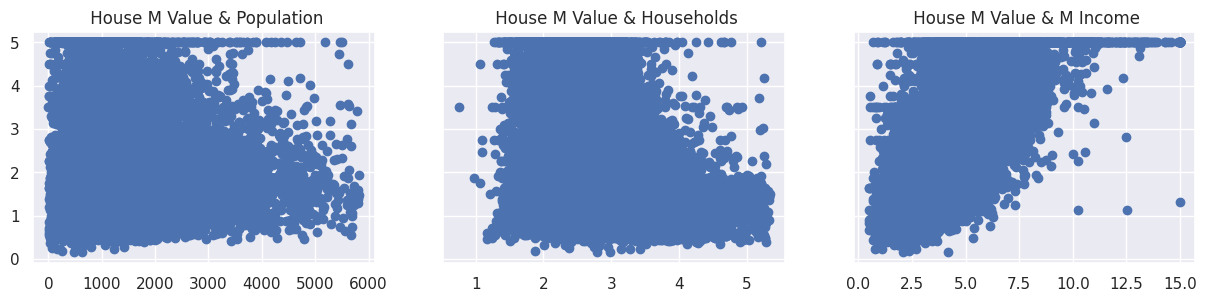

In [7]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
f,(ax4,ax5,ax6)=plt.subplots(1,3,sharey=True,figsize=(15,3))

ax1.scatter(data_cleaned['HouseAge'],data_cleaned['MedHouseVal'])
ax1.set_title('House M Value & House M Age')

ax2.scatter(data_cleaned['AveRooms'],data_cleaned['MedHouseVal'])
ax2.set_title(' House M Value &  Total Rooms')

ax3.scatter(data_cleaned['AveBedrms'],data_cleaned['MedHouseVal'])
ax3.set_title(' House M Value & Total Bedrooms')

ax4.scatter(data_cleaned['Population'],data_cleaned['MedHouseVal'])
ax4.set_title(' House M Value & Population')

ax5.scatter(data_cleaned['AveOccup'],data_cleaned['MedHouseVal'])
ax5.set_title(' House M Value & Households')

ax6.scatter(data_cleaned['MedInc'],data_cleaned['MedHouseVal'])
ax6.set_title(' House M Value & M Income')

In [8]:
log_price=np.log(data_cleaned['MedHouseVal'])

data_cleaned['log_MedHouseVal']=log_price
data_cleaned

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,log_MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,4.53,1.51
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,3.58,1.28
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,3.52,1.26
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,3.41,1.23
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,3.42,1.23
...,...,...,...,...,...,...,...,...,...,...
19819,1.56,25.00,5.05,1.13,845.00,2.56,39.48,-121.09,0.78,-0.25
19820,2.56,18.00,6.11,1.32,356.00,3.12,39.49,-121.21,0.77,-0.26
19821,1.70,17.00,5.21,1.12,1007.00,2.33,39.43,-121.22,0.92,-0.08
19822,1.87,18.00,5.33,1.17,741.00,2.12,39.43,-121.32,0.85,-0.17


Text(0.5, 1.0, 'log House M Value & M Income')

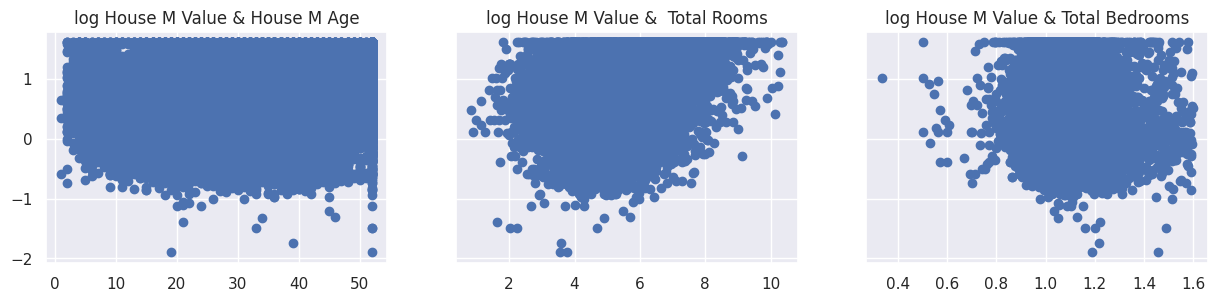

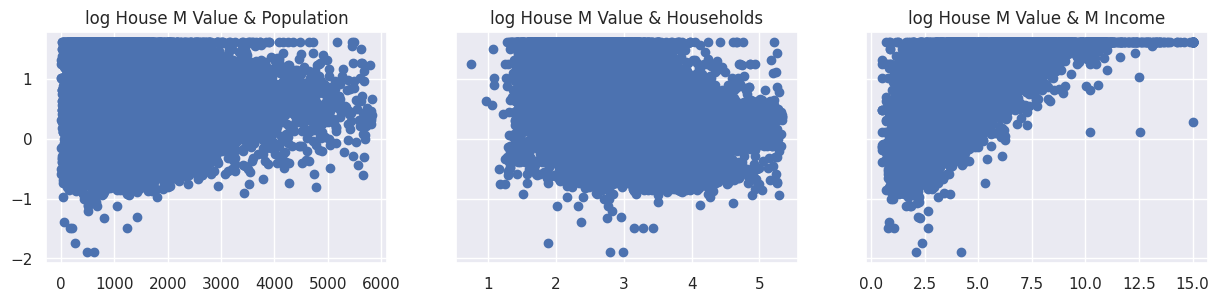

In [9]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
f,(ax4,ax5,ax6)=plt.subplots(1,3,sharey=True,figsize=(15,3))

ax1.scatter(data_cleaned['HouseAge'],data_cleaned['log_MedHouseVal'])
ax1.set_title('log House M Value & House M Age')

ax2.scatter(data_cleaned['AveRooms'],data_cleaned['log_MedHouseVal'])
ax2.set_title('log House M Value &  Total Rooms')

ax3.scatter(data_cleaned['AveBedrms'],data_cleaned['log_MedHouseVal'])
ax3.set_title('log House M Value & Total Bedrooms')

ax4.scatter(data_cleaned['Population'],data_cleaned['log_MedHouseVal'])
ax4.set_title('log House M Value & Population')

ax5.scatter(data_cleaned['AveOccup'],data_cleaned['log_MedHouseVal'])
ax5.set_title('log House M Value & Households')

ax6.scatter(data_cleaned['MedInc'],data_cleaned['log_MedHouseVal'])
ax6.set_title('log House M Value & M Income')

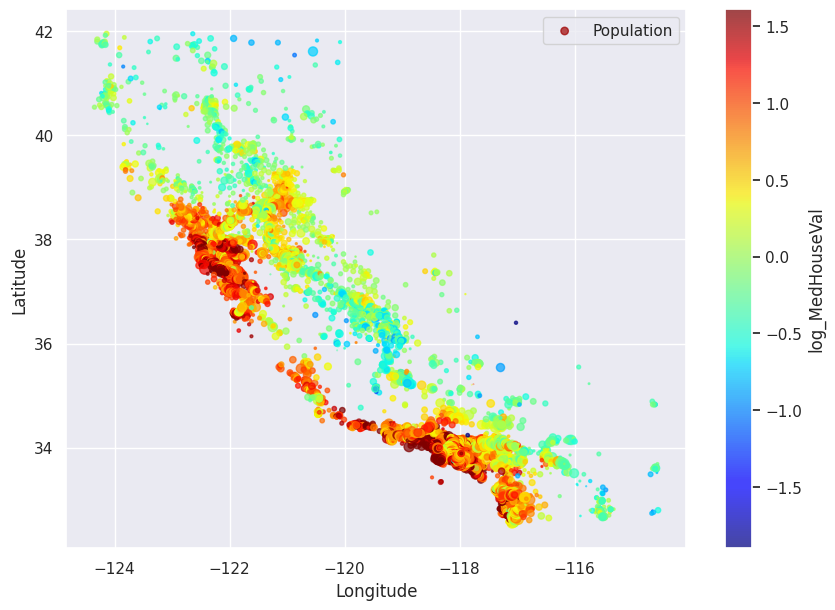

In [10]:
data_cleaned.plot(kind="scatter", x="Longitude",y="Latitude", c="log_MedHouseVal", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=data_cleaned['Population']/100, label="Population", alpha=0.7)
plt.show()

In [11]:
data_cleaned.columns
data_preprocessed=data_cleaned.drop(['MedHouseVal'],axis=1)

#Correlation

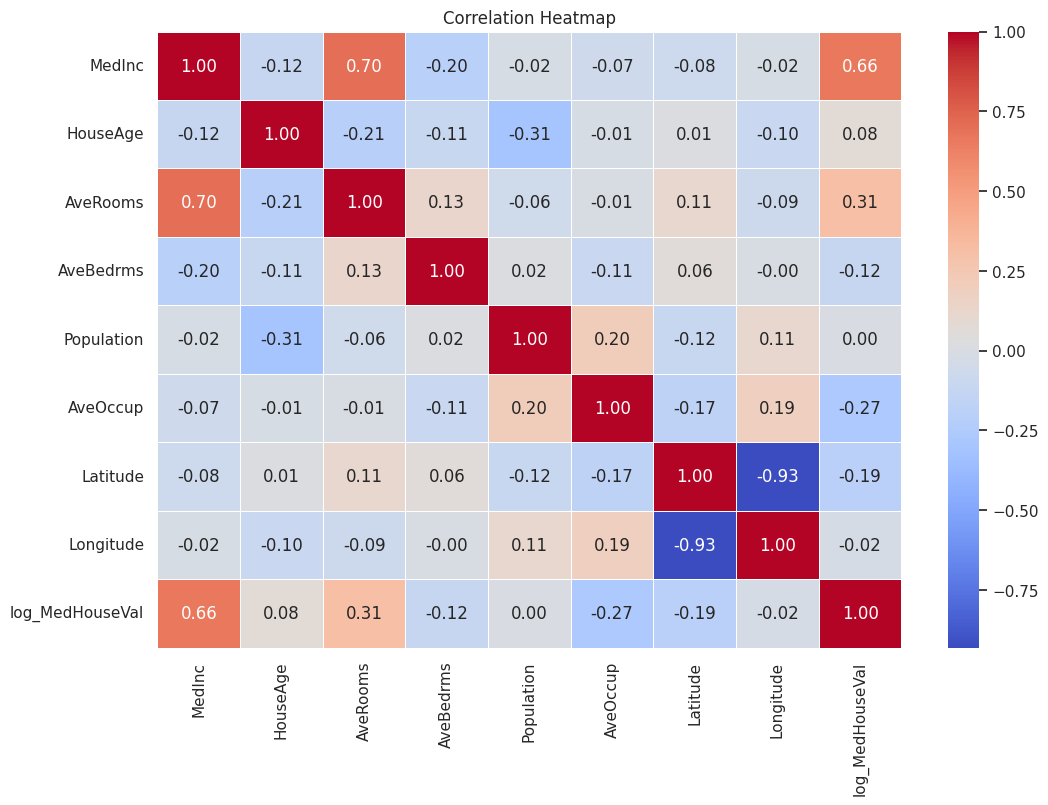

In [12]:
df_corr=data_preprocessed.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
data_preprocessed.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'log_MedHouseVal'],
      dtype='object')

In [14]:
#OLS
import statsmodels.api as sm

y=data_preprocessed['log_MedHouseVal']
x1=data_preprocessed[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_MedHouseVal   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     5274.
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:30:24   Log-Likelihood:                -5619.6
No. Observations:               19824   AIC:                         1.126e+04
Df Residuals:                   19815   BIC:                         1.133e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.2961      0.313    -74.401      0.000     -23.910     -22.682
MedInc         0.1834      0.002     86.470      0.000       0.179       0.188
HouseAge       0.0032      0.000     15.732      0.000       0.003       0.004
AveRooms      -0.0315      0.003     -9.732      0.000      -0.038      -0.025
AveBedrms      0.3047      0.027     11.179      0.000       0.251       0.358
Population  4.178e-05   2.89e-06     14.472      0.000    3.61e-05    4.74e-05
AveOccup      -0.1951      0.004    -55.690      0.000      -0.202      -0.188
Latitude      -0.2948      0.003    -86.374      0.000      -0.302      -0.288
Longitude     -0.2837      0.004    -79.933      0.000      -0.291      -0.277
==============================================================================
Omnibus:                     1060.078   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3524.709
Skew:                          -0.198   Prob(JB):                         0.00
Kurtosis:                       5.027   Cond. No.                     2.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables=data_preprocessed[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

vif['Features']=variables.columns
vif

,VIF,Features
0,14.38,MedInc
1,7.68,HouseAge
2,54.53,AveRooms
3,160.79,AveBedrms
4,4.19,Population
5,20.66,AveOccup
6,625.48,Latitude
7,1012.83,Longitude


In [16]:
#OLS
import statsmodels.api as sm

y=data_preprocessed['log_MedHouseVal']
x1=data_preprocessed[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',  'AveOccup',
       'Latitude', 'Longitude']]

x=sm.add_constant(x1)
results=sm.OLS(y,x).fit()

results.summary()

#Tried removing other features, but having it all still yields the highest R-Squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_MedHouseVal   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     5935.
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:30:24   Log-Likelihood:                -5723.8
No. Observations:               19824   AIC:                         1.146e+04
Df Residuals:                   19816   BIC:                         1.153e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.5001      0.314    -74.737      0.000     -24.116     -22.884
MedInc         0.1846      0.002     86.663      0.000       0.180       0.189
HouseAge       0.0022      0.000     11.482      0.000       0.002       0.003
AveRooms      -0.0367      0.003    -11.337      0.000      -0.043      -0.030
AveBedrms      0.3235      0.027     11.817      0.000       0.270       0.377
AveOccup      -0.1845      0.003    -53.574      0.000      -0.191      -0.178
Latitude      -0.2987      0.003    -87.308      0.000      -0.305      -0.292
Longitude     -0.2870      0.004    -80.622      0.000      -0.294      -0.280
==============================================================================
Omnibus:                     1144.500   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3605.177
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                       5.025   Cond. No.                     1.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Linear Regression

In [17]:
data_preprocessed

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,log_MedHouseVal
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23,1.51
1,8.30,21.00,6.24,0.97,2401.00,2.11,37.86,-122.22,1.28
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24,1.26
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25,1.23
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25,1.23
...,...,...,...,...,...,...,...,...,...
19819,1.56,25.00,5.05,1.13,845.00,2.56,39.48,-121.09,-0.25
19820,2.56,18.00,6.11,1.32,356.00,3.12,39.49,-121.21,-0.26
19821,1.70,17.00,5.21,1.12,1007.00,2.33,39.43,-121.22,-0.08
19822,1.87,18.00,5.33,1.17,741.00,2.12,39.43,-121.32,-0.17


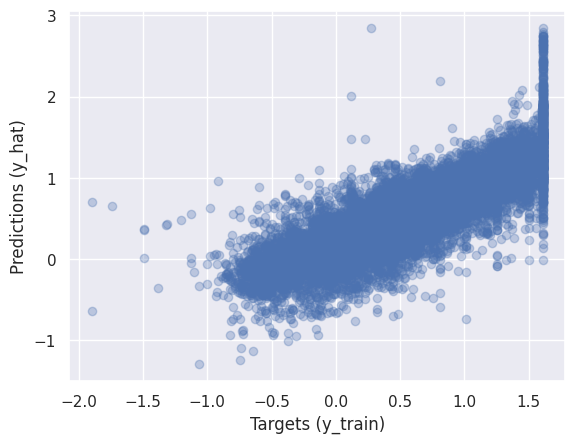

In [18]:
#Dependent Variable
targets=data_preprocessed['log_MedHouseVal']

#Indendepent Variable
inputs=data_preprocessed.drop(['log_MedHouseVal'],axis=1)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.2,random_state=42)

reg=LinearRegression()
reg.fit(x_train,y_train)

y_hat=reg.predict(x_train)

plt.scatter(y_train,y_hat,alpha=0.3)
plt.xlabel('Targets (y_train)')
plt.ylabel('Predictions (y_hat)')

plt.show()

Text(0.5, 1.0, 'Residual PDF')

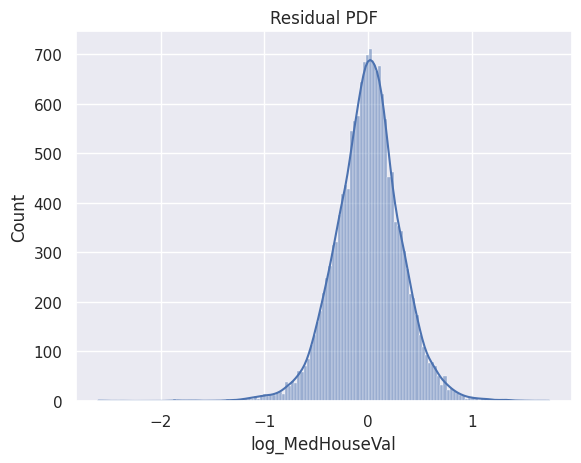

In [19]:
sns.histplot(y_train-y_hat,kde=True)
plt.title('Residual PDF')

In [20]:
r2=reg.score(x_train,y_train)

#R-Squared
x_train.shape

n=x_train.shape[0]
p=x_train.shape[1]

adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.6824290697555242

In [21]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,MedInc,0.18
1,HouseAge,0.00
2,AveRooms,-0.03
3,AveBedrms,0.30
4,Population,0.00
5,AveOccup,-0.19
6,Latitude,-0.30
7,Longitude,-0.29


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_train, y_hat))
print(f"RMSE: {rmse}")

mae = mean_absolute_error(y_train, y_hat)
print(f"MAE: {mae}")

#The close the RMSE & MAE to 0, the better. This is considered a good result

RMSE: 0.31977505393313205
MAE: 0.24204017633061262


# Test

Text(0, 0.5, 'Predictions y_hat_test')

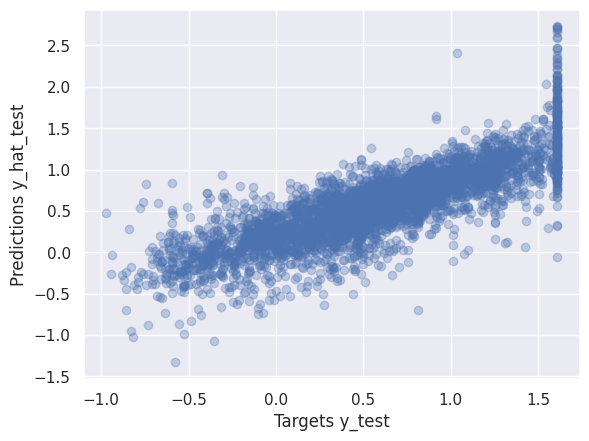

In [23]:
y_hat_test=reg.predict(x_test)

plt.scatter(y_test,y_hat_test,alpha=0.3)
plt.xlabel('Targets y_test')
plt.ylabel('Predictions y_hat_test')

In [24]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf.head()

y_test=y_test.reset_index(drop=True)
y_test.head()

df_pf['Target'] = np.exp(y_test)

df_pf['Residual']=df_pf['Target']-df_pf['Predictions']
df_pf['Diff%']=np.absolute(df_pf['Predictions']/df_pf['Target']-1)*100
df_pf

,Predictions,Target,Residual,Diff%
0,1.16,1.18,0.03,2.28
1,1.53,1.75,0.22,12.74
2,1.48,2.08,0.60,29.04
3,0.86,0.66,-0.20,31.01
4,1.36,1.76,0.40,22.65
...,...,...,...,...
3960,1.54,2.01,0.47,23.26
3961,1.59,1.89,0.30,15.98
3962,1.65,1.77,0.12,6.86
3963,1.52,1.72,0.20,11.68


In [25]:
pd.options.display.float_format = '{:.2f}'.format
print(df_pf.describe())

       Predictions  Target  Residual   Diff%
count      3965.00 3965.00   3965.00 3965.00
mean          2.01    2.10      0.08   25.98
std           1.21    1.18      0.88   27.51
min           0.26    0.38    -10.33    0.03
25%           1.31    1.21     -0.28    9.08
50%           1.82    1.83      0.01   19.33
75%           2.39    2.67      0.39   34.18
max          15.33    5.00      4.06  382.91


In [26]:
pd.options.display.max_rows = 100
pd.set_option('display.float_format',lambda x:'%.2f'%x)
df_pf.sort_values(by=['Diff%'],ascending=False)

,Predictions,Target,Residual,Diff%
2033,2.29,0.47,-1.82,382.91
1703,1.61,0.38,-1.24,326.09
2794,2.32,0.55,-1.77,320.92
212,11.15,2.81,-8.34,296.67
2240,1.83,0.47,-1.36,291.10
...,...,...,...,...
1660,1.85,1.85,0.00,0.06
2284,1.60,1.60,-0.00,0.05
377,1.01,1.01,0.00,0.05
1171,2.10,2.10,-0.00,0.04


#Prediction Model

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import t

#Predict and calculate residuals
y_pred_train = reg.predict(x_train)
residuals = y_train - y_pred_train

# Residual=Difference between actual (y_train) and predicted values (y_pred_train).

# Calculate Residual Standard Deviation (RSD)
std_residuals = np.std(residuals)

# Number of samples
N = len(y_train)

# Standard error (SE)
SE = std_residuals / np.sqrt(N)

# Define confidence level and t-critical value (For small datasets (𝑁≤30),
# use the t-distribution critical values based on degrees of freedom (𝑑𝑓=𝑁−2)
confidence_level = 0.90  # 90% CI
df_degrees = N - 2  # Degrees of freedom
t_critical = t.ppf((1 + confidence_level) / 2, df_degrees)

def predict_price_ci(features, model, SE, t_critical):
    example_input = pd.DataFrame([features])
    predicted_price = model.predict(example_input)[0]
    margin_of_error = t_critical * SE
    lower_bound = predicted_price - margin_of_error
    upper_bound = predicted_price + margin_of_error
    return predicted_price, lower_bound, upper_bound

# Get user input for all features
features = {}
for feature in ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms','Population', 'AveOccup', 'Latitude', 'Longitude']:
    features[feature] = float(input(f"Enter the value for {feature}: "))

# Call the prediction function and dis-play the results
predicted_price, lower_bound, upper_bound = predict_price_ci(features, reg, SE, t_critical)
print(f"Predicted Price: ${np.exp(predicted_price):.2f}")
print(f"90% Confidence Interval: [${np.exp(lower_bound):.2f}, ${np.exp(upper_bound):.2f}]")

Enter the value for MedInc: 6.5
Enter the value for HouseAge: 30
Enter the value for AveRooms: 5
Enter the value for AveBedrms: 1
Enter the value for Population: 1500
Enter the value for AveOccup: 3
Enter the value for Latitude: 35
Enter the value for Longitude: -120
Predicted Price: $3.82
90% Confidence Interval: [$3.81, $3.84]


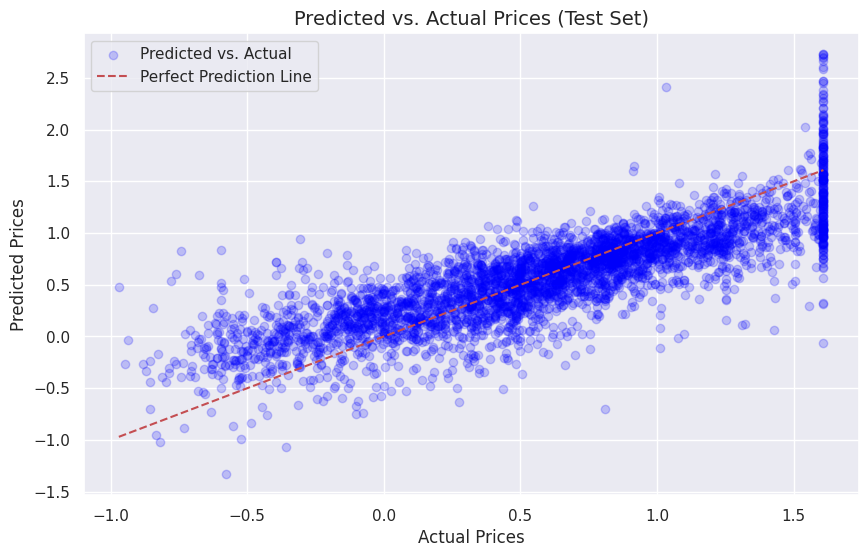

In [29]:

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test, alpha=0.2, color='blue', label='Predicted vs. Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')

plt.title('Predicted vs. Actual Prices (Test Set)', fontsize=14)
plt.xlabel('Actual Prices', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

